# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


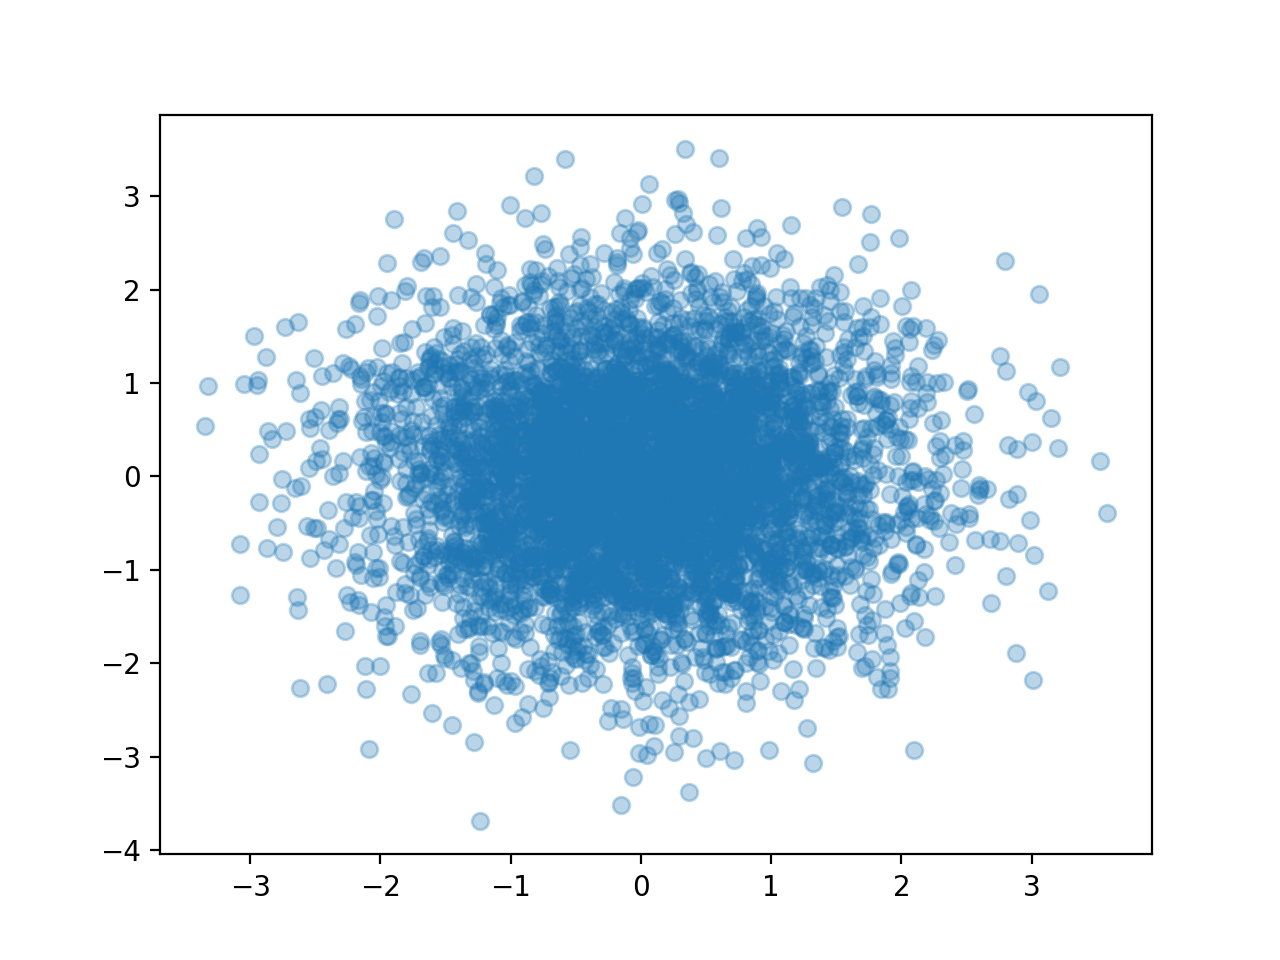

In [4]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.3)

In [5]:
tickers = ["FB", "NVDA", "AMZN", "HP", "AAPL"]

df_list = []
for ticker in tickers:
    df = pd.read_csv("ticker-" + ticker.lower() + ".csv", index_col=0, parse_dates=True)
    df_list.append(df['Adj Close'])

data = pd.concat(df_list, axis=1)
data.columns = tickers

In [7]:
data = np.log(data/data.shift())

In [8]:
data.head()

,FB,NVDA,AMZN,HP,AAPL
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.017756,0.063739,0.012694,0.004580,-0.000174
2018-01-04,-0.001843,0.005257,0.004466,0.011359,0.004634
2018-01-05,0.013579,0.008438,0.016033,0.004508,0.011321
2018-01-08,0.007624,0.030181,0.014322,0.027650,-0.003721


In [13]:
def lin_regr(ticker_a, ticker_b):
    X = data[ticker_a].iloc[1:].values.reshape(-1, 1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1, 1)
    
    lin_regressor = LinearRegression()
    lin_regressor.fit(X, Y)
    Y_pred = lin_regressor.predict(X)
    
    alpha = str(round(lin_regressor.intercept_[0], 5))
    beta = str(round(lin_regressor.coef_[0][0], 5))
    
    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + alpha + ", Beta: " + beta)
    ax.scatter(X, Y, alpha=0.3)
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


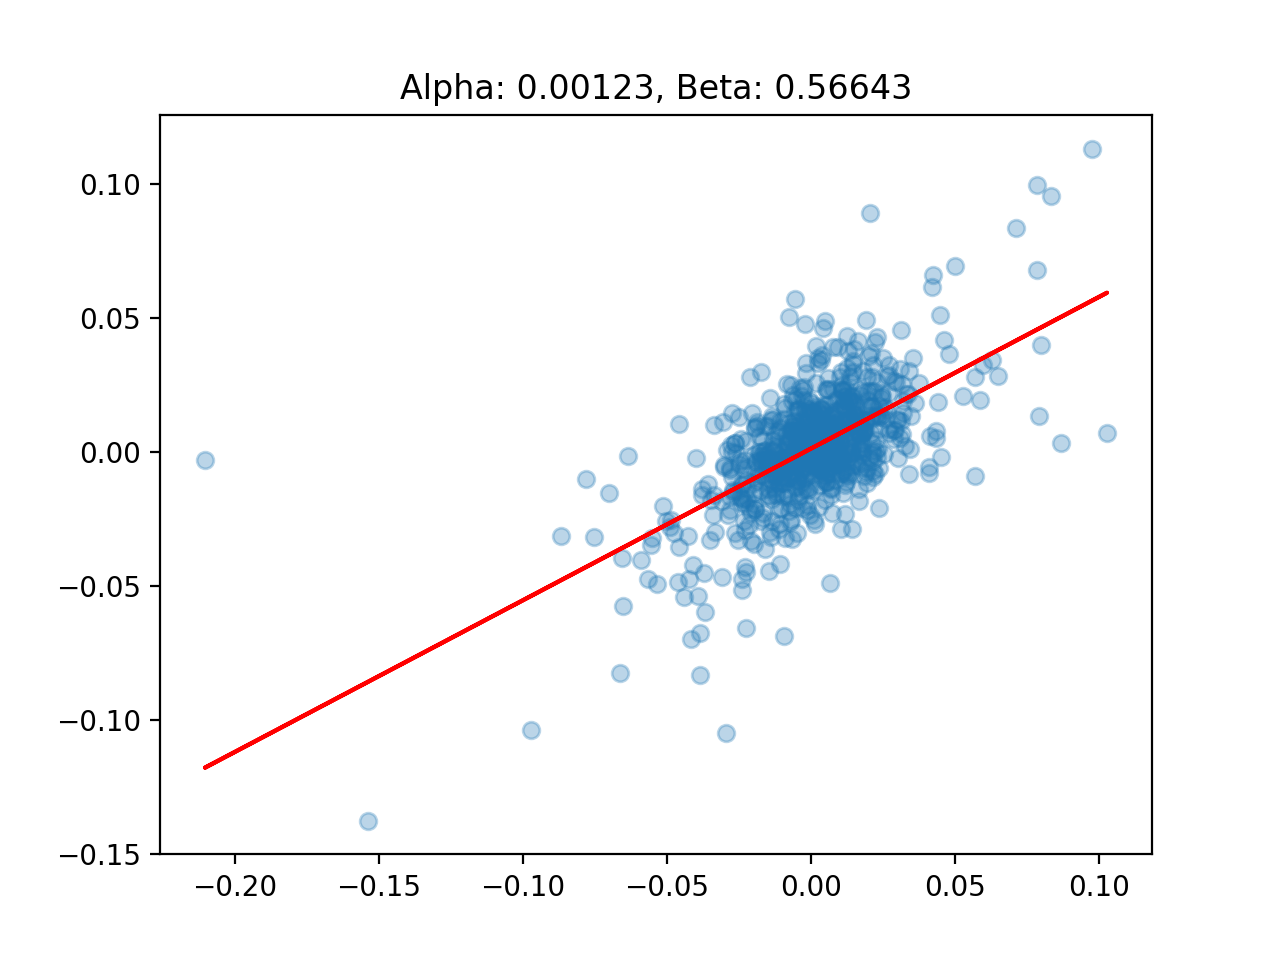

In [14]:
lin_regr("FB", "AAPL")

<IPython.core.display.Javascript object>


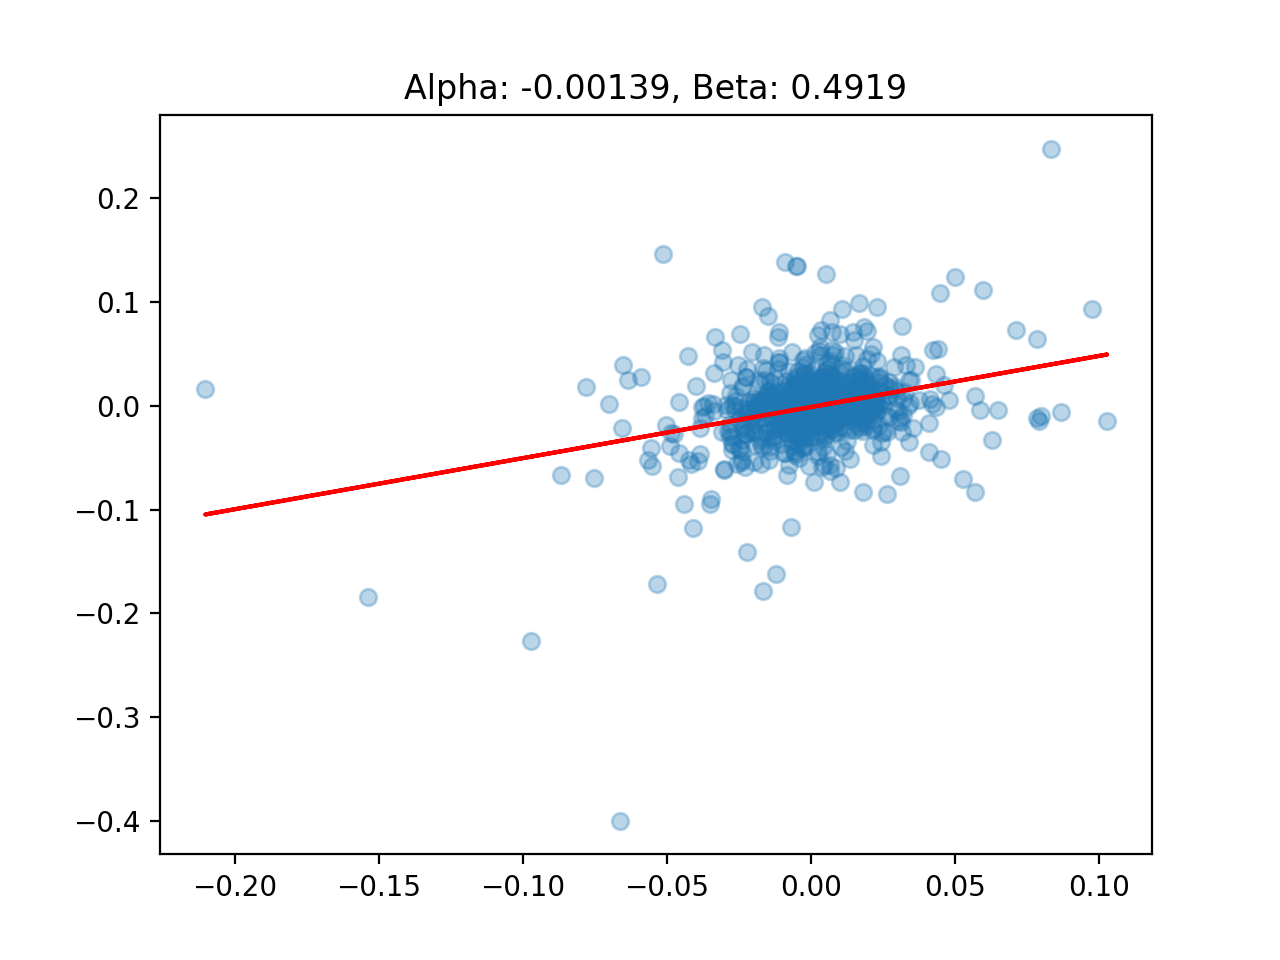

In [16]:
lin_regr("FB", "HP")

In [18]:
def calc_beta(ticker_a, ticker_b):
    X = data[ticker_a].iloc[1:].values.reshape(-1, 1)
    Y = data[ticker_b].iloc[1:].values.reshape(-1, 1)
    
    lin_regressor = LinearRegression()
    lin_regressor.fit(X, Y)
    Y_pred = lin_regressor.predict(X)
    
    return lin_regressor.coef_[0][0]

In [19]:
calc_beta("FB", "HP")

0.49190362301630897

In [20]:
import itertools

df = pd.DataFrame(None, index=tickers, columns=tickers)
for t1, t2 in itertools.combinations(tickers, 2):
    df.loc[t1][t2] = calc_beta(t1, t2)
    df.loc[t2][t1] = calc_beta(t2, t1)

for t in tickers:
    df.loc[t][t] = calc_beta(t, t)

In [21]:
df

,FB,NVDA,AMZN,HP,AAPL
FB,1,0.75991,0.545486,0.491904,0.566428
NVDA,0.442601,1,0.420485,0.456463,0.461507
AMZN,0.730375,0.966634,1,0.515556,0.696052
HP,0.18387,0.292944,0.143927,1,0.221133
AAPL,0.67593,0.94555,0.620349,0.705959,1
